In [1]:
%%capture
# pip install NeuralForecast

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from neuralforecast.models import NHITS
from neuralforecast import NeuralForecast
from neuralforecast.core import NeuralForecast
from neuralforecast.models import Informer, Autoformer,NHITS
from neuralforecast.models import NBEATS,FEDformer
from neuralforecast.losses.numpy import mae,mse


In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# X_df = pd.read_csv('/content/drive/MyDrive/AML/traffic/M/df_x.csv')
# Y_df = pd.read_csv('/content/drive/MyDrive/AML/traffic/M/df_y.csv')

X_df = pd.read_csv('@datasets_reproducibity/traffic/M/df_x.csv')
Y_df = pd.read_csv('@datasets_reproducibity/traffic/M/df_y.csv')



In [4]:
X_df

,ds,ex_1,ex_2,ex_3,ex_4
0,2016-07-01 02:00:00,-0.413043,0.166667,-0.500000,-0.00137
1,2016-07-01 03:00:00,-0.369565,0.166667,-0.500000,-0.00137
2,2016-07-01 04:00:00,-0.326087,0.166667,-0.500000,-0.00137
3,2016-07-01 05:00:00,-0.282609,0.166667,-0.500000,-0.00137
4,2016-07-01 06:00:00,-0.239130,0.166667,-0.500000,-0.00137
...,...,...,...,...,...
17539,2018-07-01 21:00:00,0.413043,0.500000,-0.500000,-0.00411
17540,2018-07-01 22:00:00,0.456522,0.500000,-0.500000,-0.00411
17541,2018-07-01 23:00:00,0.500000,0.500000,-0.500000,-0.00411
17542,2018-07-02 00:00:00,-0.500000,-0.500000,-0.466667,-0.00137


In [5]:
a=Y_df['unique_id'].unique()
a.size

862

In [6]:
merged_df = pd.merge(Y_df, X_df[['ds', 'ex_1', 'ex_2','ex_3','ex_4']], on='ds', how='left')
merged_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2016-07-01 02:00:00,0,-0.711224,-0.413043,0.166667,-0.500000,-0.00137
1,2016-07-01 02:00:00,1,-0.643331,-0.413043,0.166667,-0.500000,-0.00137
2,2016-07-01 02:00:00,2,-0.925668,-0.413043,0.166667,-0.500000,-0.00137
3,2016-07-01 02:00:00,3,-1.182531,-0.413043,0.166667,-0.500000,-0.00137
4,2016-07-01 02:00:00,4,-0.569992,-0.413043,0.166667,-0.500000,-0.00137
...,...,...,...,...,...,...,...
15122923,2018-07-02 01:00:00,857,-0.311380,-0.456522,-0.500000,-0.466667,-0.00137
15122924,2018-07-02 01:00:00,858,-2.129480,-0.456522,-0.500000,-0.466667,-0.00137
15122925,2018-07-02 01:00:00,859,-1.582374,-0.456522,-0.500000,-0.466667,-0.00137
15122926,2018-07-02 01:00:00,860,-0.555770,-0.456522,-0.500000,-0.466667,-0.00137


In [7]:
filtered_df = merged_df[merged_df['unique_id'] == 'OT']
filtered_df.reset_index(drop=True, inplace=True)
# filtered_df.drop("ds",axis=1,inplace=True)
filtered_df['ds'] = pd.to_datetime(filtered_df['ds'])

Y_df=filtered_df
Y_df

/tmp/ipykernel_21029/809827270.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['ds'] = pd.to_datetime(filtered_df['ds'])


,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2016-07-01 02:00:00,OT,-0.991924,-0.413043,0.166667,-0.500000,-0.00137
1,2016-07-01 03:00:00,OT,-0.906315,-0.369565,0.166667,-0.500000,-0.00137
2,2016-07-01 04:00:00,OT,-1.071826,-0.326087,0.166667,-0.500000,-0.00137
3,2016-07-01 05:00:00,OT,-1.277288,-0.282609,0.166667,-0.500000,-0.00137
4,2016-07-01 06:00:00,OT,-1.459921,-0.239130,0.166667,-0.500000,-0.00137
...,...,...,...,...,...,...,...
17539,2018-07-01 21:00:00,OT,0.765917,0.413043,0.500000,-0.500000,-0.00411
17540,2018-07-01 22:00:00,OT,0.389237,0.456522,0.500000,-0.500000,-0.00411
17541,2018-07-01 23:00:00,OT,0.172360,0.500000,0.500000,-0.500000,-0.00411
17542,2018-07-02 00:00:00,OT,-0.090175,-0.500000,-0.500000,-0.466667,-0.00137


In [8]:
Y_df['unique_id'].unique()

array(['OT'], dtype=object)

In [9]:
Y_df.shape

(17544, 7)

## Horizon 96

In [11]:
Y_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2016-07-01 02:00:00,OT,-0.991924,-0.413043,0.166667,-0.500000,-0.00137
1,2016-07-01 03:00:00,OT,-0.906315,-0.369565,0.166667,-0.500000,-0.00137
2,2016-07-01 04:00:00,OT,-1.071826,-0.326087,0.166667,-0.500000,-0.00137
3,2016-07-01 05:00:00,OT,-1.277288,-0.282609,0.166667,-0.500000,-0.00137
4,2016-07-01 06:00:00,OT,-1.459921,-0.239130,0.166667,-0.500000,-0.00137
...,...,...,...,...,...,...,...
17539,2018-07-01 21:00:00,OT,0.765917,0.413043,0.500000,-0.500000,-0.00411
17540,2018-07-01 22:00:00,OT,0.389237,0.456522,0.500000,-0.500000,-0.00411
17541,2018-07-01 23:00:00,OT,0.172360,0.500000,0.500000,-0.500000,-0.00411
17542,2018-07-02 00:00:00,OT,-0.090175,-0.500000,-0.500000,-0.466667,-0.00137


In [12]:
Y_train_df = Y_df.iloc[:17448,:]
Y_test_df = Y_df.iloc[17448:,:]

In [13]:
Y_test_df = Y_test_df.reset_index()

In [14]:
Y_test_df

,index,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,17448,2018-06-28 02:00:00,OT,-1.168850,-0.413043,0.0,0.400000,-0.012329
1,17449,2018-06-28 03:00:00,OT,-1.380019,-0.369565,0.0,0.400000,-0.012329
2,17450,2018-06-28 04:00:00,OT,-1.414263,-0.326087,0.0,0.400000,-0.012329
3,17451,2018-06-28 05:00:00,OT,-1.380019,-0.282609,0.0,0.400000,-0.012329
4,17452,2018-06-28 06:00:00,OT,-1.168850,-0.239130,0.0,0.400000,-0.012329
...,...,...,...,...,...,...,...,...
91,17539,2018-07-01 21:00:00,OT,0.765917,0.413043,0.5,-0.500000,-0.004110
92,17540,2018-07-01 22:00:00,OT,0.389237,0.456522,0.5,-0.500000,-0.004110
93,17541,2018-07-01 23:00:00,OT,0.172360,0.500000,0.5,-0.500000,-0.004110
94,17542,2018-07-02 00:00:00,OT,-0.090175,-0.500000,-0.5,-0.466667,-0.001370


In [15]:
Y_test_df.drop(['index'], axis=1, inplace=True)
Y_test_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2018-06-28 02:00:00,OT,-1.168850,-0.413043,0.0,0.400000,-0.012329
1,2018-06-28 03:00:00,OT,-1.380019,-0.369565,0.0,0.400000,-0.012329
2,2018-06-28 04:00:00,OT,-1.414263,-0.326087,0.0,0.400000,-0.012329
3,2018-06-28 05:00:00,OT,-1.380019,-0.282609,0.0,0.400000,-0.012329
4,2018-06-28 06:00:00,OT,-1.168850,-0.239130,0.0,0.400000,-0.012329
...,...,...,...,...,...,...,...
91,2018-07-01 21:00:00,OT,0.765917,0.413043,0.5,-0.500000,-0.004110
92,2018-07-01 22:00:00,OT,0.389237,0.456522,0.5,-0.500000,-0.004110
93,2018-07-01 23:00:00,OT,0.172360,0.500000,0.5,-0.500000,-0.004110
94,2018-07-02 00:00:00,OT,-0.090175,-0.500000,-0.5,-0.466667,-0.001370


In [23]:
horizon = 96
model = Informer(h=horizon, input_size=24,
               max_steps=450,
               )

/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/utilities/parsing.py:199: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
Seed set to 1


In [24]:
nf = NeuralForecast(models=[model],freq='H')

In [25]:
nf.fit(df=Y_train_df)
forecasts = nf.predict()


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type          | Params
------------------------------------------------
0 | loss          | MAE           | 0     
1 | padder_train  | ConstantPad1d | 0     
2 | scaler        | TemporalNorm  | 0     
3 | enc_embedding | DataEmbedding | 384   
4 | dec_embedding | DataEmbedding | 384   
5 | encoder       | TransEncoder  | 199 K 
6 | decoder       | TransDecoder  | 141 K 
------------------------------------------------
341 K     Trainable params
0         Non-trainable params
341 K     Total params
1.368     Total estimated model params size (MB)


Sanity Checking: |                                                                                | 0/? [00:00…

/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |                                                                                       | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

`Trainer.fit` stopped: `max_steps=450` reached.
/home/nirmal/anaconda3/lib/python3.11/site-packages/neuralforecast/tsdataset.py:92: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.temporal = torch.tensor(temporal, dtype=torch.float)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.


Predicting: |                                                                                     | 0/? [00:00…

/home/nirmal/anaconda3/lib/python3.11/site-packages/neuralforecast/core.py:184: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [26]:
forecasts['ds'] = [i for i in range(len(forecasts))]
forecasts

,ds,Informer
unique_id,,
OT,0,-0.516813
OT,1,-0.502245
OT,2,-0.542853
OT,3,-0.426670
OT,4,-0.631531
...,...,...
OT,91,1.412701
OT,92,1.444715
OT,93,1.484321


<Axes: xlabel='ds'>

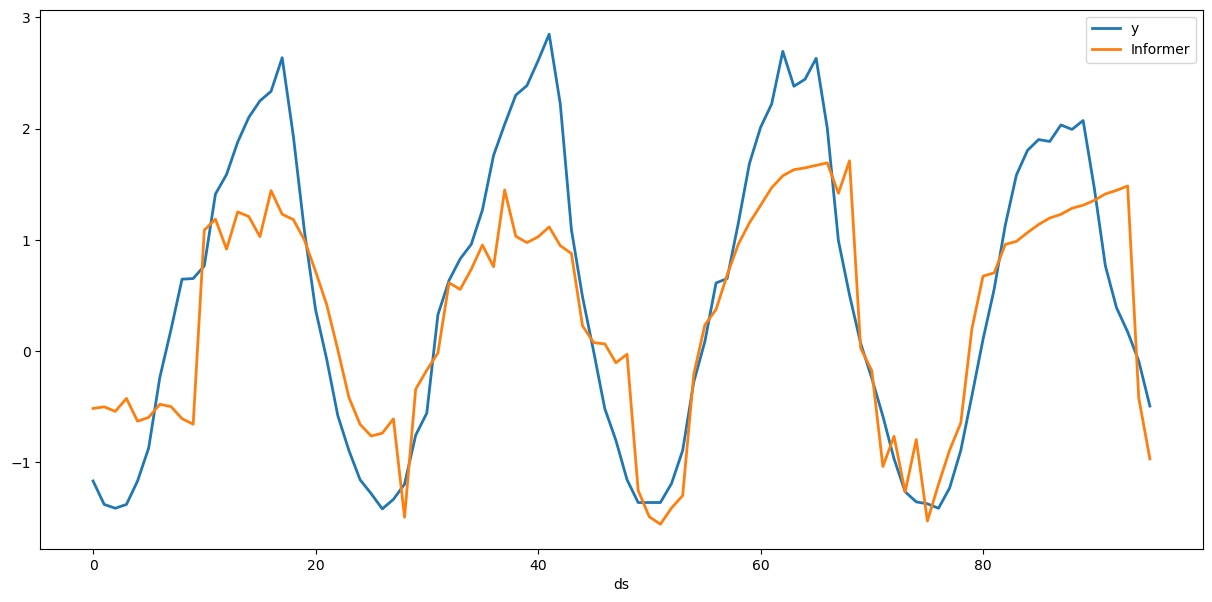

In [27]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plot_df = forecasts.set_index('ds')
Y_test_df[['y']].plot(ax=ax,linewidth=2)
plot_df[[ 'Informer']].plot(ax=ax, linewidth=2)

In [28]:
forecasts=forecasts.set_index('ds')
forecasts

,Informer
ds,
0,-0.516813
1,-0.502245
2,-0.542853
3,-0.426670
4,-0.631531
...,...
91,1.412701
92,1.444715
93,1.484321


In [29]:
mae_Informer = mae(Y_test_df['y'], forecasts['Informer'])
mse_Informer = mse(Y_test_df['y'], forecasts['Informer'])
print(f'Informer MAE: {mae_Informer:.3f}')
print(f'Informer MSE: {mse_Informer:.3f}')

Informer MAE: 0.576
Informer MSE: 0.488


## Horizon 192

In [30]:
Y_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2016-07-01 02:00:00,OT,-0.991924,-0.413043,0.166667,-0.500000,-0.00137
1,2016-07-01 03:00:00,OT,-0.906315,-0.369565,0.166667,-0.500000,-0.00137
2,2016-07-01 04:00:00,OT,-1.071826,-0.326087,0.166667,-0.500000,-0.00137
3,2016-07-01 05:00:00,OT,-1.277288,-0.282609,0.166667,-0.500000,-0.00137
4,2016-07-01 06:00:00,OT,-1.459921,-0.239130,0.166667,-0.500000,-0.00137
...,...,...,...,...,...,...,...
17539,2018-07-01 21:00:00,OT,0.765917,0.413043,0.500000,-0.500000,-0.00411
17540,2018-07-01 22:00:00,OT,0.389237,0.456522,0.500000,-0.500000,-0.00411
17541,2018-07-01 23:00:00,OT,0.172360,0.500000,0.500000,-0.500000,-0.00411
17542,2018-07-02 00:00:00,OT,-0.090175,-0.500000,-0.500000,-0.466667,-0.00137


In [31]:
Y_train_df = Y_df.iloc[:17348,:]
Y_test_df = Y_df.iloc[17348:,:]

In [32]:
Y_test_df = Y_test_df.reset_index()

In [33]:
Y_test_df

,index,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,17348,2018-06-23 22:00:00,OT,1.022745,0.456522,0.333333,0.233333,-0.026027
1,17349,2018-06-23 23:00:00,OT,0.491968,0.500000,0.333333,0.233333,-0.026027
2,17350,2018-06-24 00:00:00,OT,-0.027394,-0.500000,0.500000,0.266667,-0.023288
3,17351,2018-06-24 01:00:00,OT,-0.421197,-0.456522,0.500000,0.266667,-0.023288
4,17352,2018-06-24 02:00:00,OT,-0.837828,-0.413043,0.500000,0.266667,-0.023288
...,...,...,...,...,...,...,...,...
191,17539,2018-07-01 21:00:00,OT,0.765917,0.413043,0.500000,-0.500000,-0.004110
192,17540,2018-07-01 22:00:00,OT,0.389237,0.456522,0.500000,-0.500000,-0.004110
193,17541,2018-07-01 23:00:00,OT,0.172360,0.500000,0.500000,-0.500000,-0.004110
194,17542,2018-07-02 00:00:00,OT,-0.090175,-0.500000,-0.500000,-0.466667,-0.001370


In [34]:
Y_test_df.drop(['index'], axis=1, inplace=True)
Y_test_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2018-06-23 22:00:00,OT,1.022745,0.456522,0.333333,0.233333,-0.026027
1,2018-06-23 23:00:00,OT,0.491968,0.500000,0.333333,0.233333,-0.026027
2,2018-06-24 00:00:00,OT,-0.027394,-0.500000,0.500000,0.266667,-0.023288
3,2018-06-24 01:00:00,OT,-0.421197,-0.456522,0.500000,0.266667,-0.023288
4,2018-06-24 02:00:00,OT,-0.837828,-0.413043,0.500000,0.266667,-0.023288
...,...,...,...,...,...,...,...
191,2018-07-01 21:00:00,OT,0.765917,0.413043,0.500000,-0.500000,-0.004110
192,2018-07-01 22:00:00,OT,0.389237,0.456522,0.500000,-0.500000,-0.004110
193,2018-07-01 23:00:00,OT,0.172360,0.500000,0.500000,-0.500000,-0.004110
194,2018-07-02 00:00:00,OT,-0.090175,-0.500000,-0.500000,-0.466667,-0.001370


In [49]:
horizon = 192
model = Informer(h=horizon, input_size=24,
               max_steps=650,
               )

/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/utilities/parsing.py:199: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
Seed set to 1


In [50]:
nf = NeuralForecast(models=[model],freq='H')

In [51]:
nf.fit(df=Y_train_df)
forecasts = nf.predict()


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type          | Params
------------------------------------------------
0 | loss          | MAE           | 0     
1 | padder_train  | ConstantPad1d | 0     
2 | scaler        | TemporalNorm  | 0     
3 | enc_embedding | DataEmbedding | 384   
4 | dec_embedding | DataEmbedding | 384   
5 | encoder       | TransEncoder  | 199 K 
6 | decoder       | TransDecoder  | 141 K 
------------------------------------------------
341 K     Trainable params
0         Non-trainable params
341 K     Total params
1.368     Total estimated model params size (MB)


Sanity Checking: |                                                                                | 0/? [00:00…

/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |                                                                                       | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

`Trainer.fit` stopped: `max_steps=650` reached.
/home/nirmal/anaconda3/lib/python3.11/site-packages/neuralforecast/tsdataset.py:92: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.temporal = torch.tensor(temporal, dtype=torch.float)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.


Predicting: |                                                                                     | 0/? [00:00…

/home/nirmal/anaconda3/lib/python3.11/site-packages/neuralforecast/core.py:184: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [52]:
forecasts['ds'] = [i for i in range(len(forecasts))]
forecasts

,ds,Informer
unique_id,,
OT,0,-0.014623
OT,1,0.257935
OT,2,0.109621
OT,3,-0.115106
OT,4,-0.272908
...,...,...
OT,187,1.885944
OT,188,1.916494
OT,189,1.917885


<Axes: xlabel='ds'>

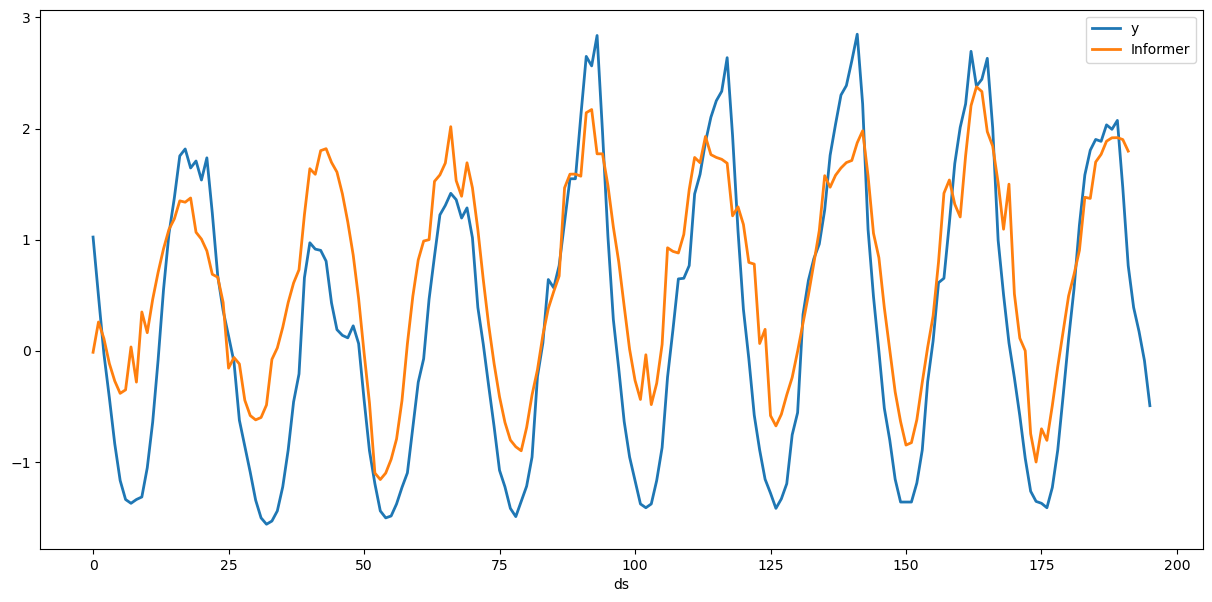

In [53]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plot_df = forecasts.set_index('ds')
Y_test_df[['y']].plot(ax=ax,linewidth=2)
plot_df[[ 'Informer']].plot(ax=ax, linewidth=2)

In [54]:
forecasts=forecasts.set_index('ds')
forecasts

,Informer
ds,
0,-0.014623
1,0.257935
2,0.109621
3,-0.115106
4,-0.272908
...,...
187,1.885944
188,1.916494
189,1.917885


In [55]:
mae_Informer = mae(Y_test_df['y'], forecasts['Informer'])
mse_Informer = mse(Y_test_df['y'], forecasts['Informer'])
print(f'Informer MAE: {mae_Informer:.3f}')
print(f'Informer MSE: {mse_Informer:.3f}')

Informer MAE: 0.604
Informer MSE: 0.501


## Horizon 336

In [56]:
Y_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2016-07-01 02:00:00,OT,-0.991924,-0.413043,0.166667,-0.500000,-0.00137
1,2016-07-01 03:00:00,OT,-0.906315,-0.369565,0.166667,-0.500000,-0.00137
2,2016-07-01 04:00:00,OT,-1.071826,-0.326087,0.166667,-0.500000,-0.00137
3,2016-07-01 05:00:00,OT,-1.277288,-0.282609,0.166667,-0.500000,-0.00137
4,2016-07-01 06:00:00,OT,-1.459921,-0.239130,0.166667,-0.500000,-0.00137
...,...,...,...,...,...,...,...
17539,2018-07-01 21:00:00,OT,0.765917,0.413043,0.500000,-0.500000,-0.00411
17540,2018-07-01 22:00:00,OT,0.389237,0.456522,0.500000,-0.500000,-0.00411
17541,2018-07-01 23:00:00,OT,0.172360,0.500000,0.500000,-0.500000,-0.00411
17542,2018-07-02 00:00:00,OT,-0.090175,-0.500000,-0.500000,-0.466667,-0.00137


In [57]:
Y_train_df = Y_df.iloc[:17208,:]
Y_test_df = Y_df.iloc[17208:,:]

In [58]:
Y_test_df = Y_test_df.reset_index()

In [59]:
Y_test_df

,index,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,17208,2018-06-18 02:00:00,OT,-0.729390,-0.413043,-0.5,0.066667,-0.039726
1,17209,2018-06-18 03:00:00,OT,-1.117484,-0.369565,-0.5,0.066667,-0.039726
2,17210,2018-06-18 04:00:00,OT,-1.277288,-0.326087,-0.5,0.066667,-0.039726
3,17211,2018-06-18 05:00:00,OT,-1.402848,-0.282609,-0.5,0.066667,-0.039726
4,17212,2018-06-18 06:00:00,OT,-1.465628,-0.239130,-0.5,0.066667,-0.039726
...,...,...,...,...,...,...,...,...
331,17539,2018-07-01 21:00:00,OT,0.765917,0.413043,0.5,-0.500000,-0.004110
332,17540,2018-07-01 22:00:00,OT,0.389237,0.456522,0.5,-0.500000,-0.004110
333,17541,2018-07-01 23:00:00,OT,0.172360,0.500000,0.5,-0.500000,-0.004110
334,17542,2018-07-02 00:00:00,OT,-0.090175,-0.500000,-0.5,-0.466667,-0.001370


In [60]:
Y_test_df.drop(['index'], axis=1, inplace=True)
Y_test_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2018-06-18 02:00:00,OT,-0.729390,-0.413043,-0.5,0.066667,-0.039726
1,2018-06-18 03:00:00,OT,-1.117484,-0.369565,-0.5,0.066667,-0.039726
2,2018-06-18 04:00:00,OT,-1.277288,-0.326087,-0.5,0.066667,-0.039726
3,2018-06-18 05:00:00,OT,-1.402848,-0.282609,-0.5,0.066667,-0.039726
4,2018-06-18 06:00:00,OT,-1.465628,-0.239130,-0.5,0.066667,-0.039726
...,...,...,...,...,...,...,...
331,2018-07-01 21:00:00,OT,0.765917,0.413043,0.5,-0.500000,-0.004110
332,2018-07-01 22:00:00,OT,0.389237,0.456522,0.5,-0.500000,-0.004110
333,2018-07-01 23:00:00,OT,0.172360,0.500000,0.5,-0.500000,-0.004110
334,2018-07-02 00:00:00,OT,-0.090175,-0.500000,-0.5,-0.466667,-0.001370


In [68]:
horizon = 336
model = Informer(h=horizon, input_size=24,
               max_steps=800,
               )

/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/utilities/parsing.py:199: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
Seed set to 1


In [69]:
nf = NeuralForecast(models=[model],freq='H')

In [70]:
nf.fit(df=Y_train_df)
forecasts = nf.predict()


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type          | Params
------------------------------------------------
0 | loss          | MAE           | 0     
1 | padder_train  | ConstantPad1d | 0     
2 | scaler        | TemporalNorm  | 0     
3 | enc_embedding | DataEmbedding | 384   
4 | dec_embedding | DataEmbedding | 384   
5 | encoder       | TransEncoder  | 199 K 
6 | decoder       | TransDecoder  | 141 K 
------------------------------------------------
341 K     Trainable params
0         Non-trainable params
341 K     Total params
1.368     Total estimated model params size (MB)


Sanity Checking: |                                                                                | 0/? [00:00…

/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |                                                                                       | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

`Trainer.fit` stopped: `max_steps=800` reached.
/home/nirmal/anaconda3/lib/python3.11/site-packages/neuralforecast/tsdataset.py:92: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.temporal = torch.tensor(temporal, dtype=torch.float)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.


Predicting: |                                                                                     | 0/? [00:00…

/home/nirmal/anaconda3/lib/python3.11/site-packages/neuralforecast/core.py:184: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [71]:
forecasts['ds'] = [i for i in range(len(forecasts))]
forecasts

,ds,Informer
unique_id,,
OT,0,-1.057730
OT,1,-1.160458
OT,2,-1.432891
OT,3,-1.174853
OT,4,-1.321013
...,...,...
OT,331,1.092859
OT,332,0.911793
OT,333,0.759780


<Axes: xlabel='ds'>

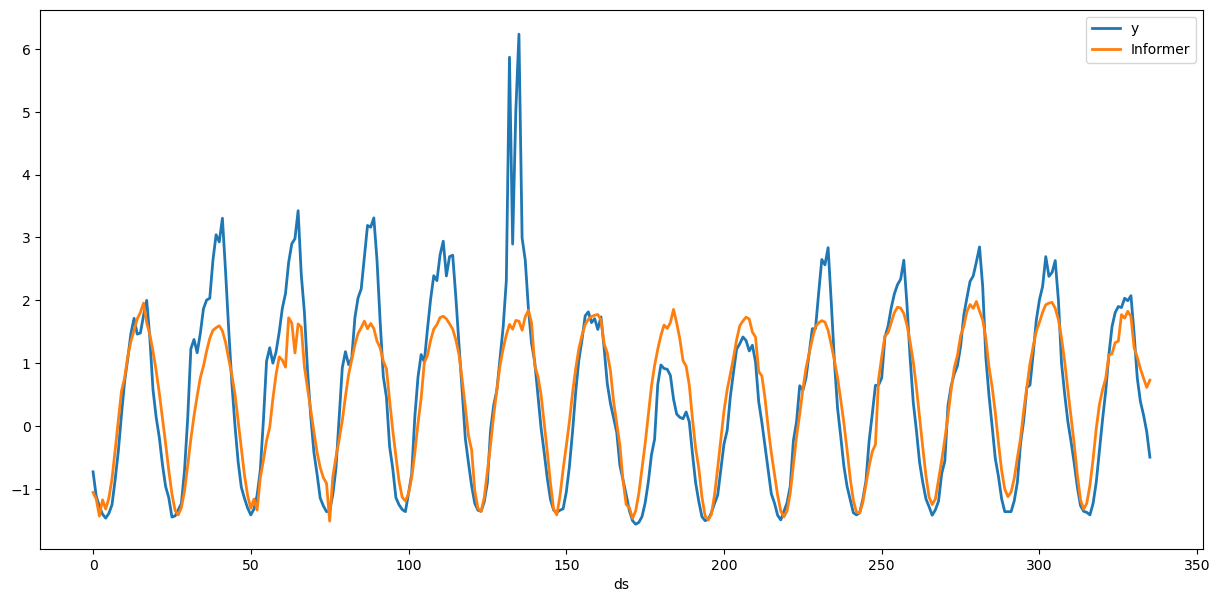

In [72]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plot_df = forecasts.set_index('ds')
Y_test_df[['y']].plot(ax=ax,linewidth=2)
plot_df[[ 'Informer']].plot(ax=ax, linewidth=2)

In [73]:
forecasts=forecasts.set_index('ds')
forecasts

,Informer
ds,
0,-1.057730
1,-1.160458
2,-1.432891
3,-1.174853
4,-1.321013
...,...
331,1.092859
332,0.911793
333,0.759780


In [74]:
mae_Informer = mae(Y_test_df['y'], forecasts['Informer'])
mse_Informer = mse(Y_test_df['y'], forecasts['Informer'])
print(f'Informer MAE: {mae_Informer:.3f}')
print(f'Informer MSE: {mse_Informer:.3f}')

Informer MAE: 0.501
Informer MSE: 0.508


## Horizon 720

In [10]:
Y_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2016-07-01 02:00:00,OT,-0.991924,-0.413043,0.166667,-0.500000,-0.00137
1,2016-07-01 03:00:00,OT,-0.906315,-0.369565,0.166667,-0.500000,-0.00137
2,2016-07-01 04:00:00,OT,-1.071826,-0.326087,0.166667,-0.500000,-0.00137
3,2016-07-01 05:00:00,OT,-1.277288,-0.282609,0.166667,-0.500000,-0.00137
4,2016-07-01 06:00:00,OT,-1.459921,-0.239130,0.166667,-0.500000,-0.00137
...,...,...,...,...,...,...,...
17539,2018-07-01 21:00:00,OT,0.765917,0.413043,0.500000,-0.500000,-0.00411
17540,2018-07-01 22:00:00,OT,0.389237,0.456522,0.500000,-0.500000,-0.00411
17541,2018-07-01 23:00:00,OT,0.172360,0.500000,0.500000,-0.500000,-0.00411
17542,2018-07-02 00:00:00,OT,-0.090175,-0.500000,-0.500000,-0.466667,-0.00137


In [11]:
Y_train_df = Y_df.iloc[:16824,:]
Y_test_df = Y_df.iloc[16824:,:]

In [12]:
Y_test_df = Y_test_df.reset_index()

In [13]:
Y_test_df

,index,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,16824,2018-06-02 02:00:00,OT,-1.088948,-0.413043,0.333333,-0.466667,-0.083562
1,16825,2018-06-02 03:00:00,OT,-1.374312,-0.369565,0.333333,-0.466667,-0.083562
2,16826,2018-06-02 04:00:00,OT,-1.419970,-0.326087,0.333333,-0.466667,-0.083562
3,16827,2018-06-02 05:00:00,OT,-1.317239,-0.282609,0.333333,-0.466667,-0.083562
4,16828,2018-06-02 06:00:00,OT,-1.140314,-0.239130,0.333333,-0.466667,-0.083562
...,...,...,...,...,...,...,...,...
715,17539,2018-07-01 21:00:00,OT,0.765917,0.413043,0.500000,-0.500000,-0.004110
716,17540,2018-07-01 22:00:00,OT,0.389237,0.456522,0.500000,-0.500000,-0.004110
717,17541,2018-07-01 23:00:00,OT,0.172360,0.500000,0.500000,-0.500000,-0.004110
718,17542,2018-07-02 00:00:00,OT,-0.090175,-0.500000,-0.500000,-0.466667,-0.001370


In [14]:
Y_test_df.drop(['index'], axis=1, inplace=True)
Y_test_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2018-06-02 02:00:00,OT,-1.088948,-0.413043,0.333333,-0.466667,-0.083562
1,2018-06-02 03:00:00,OT,-1.374312,-0.369565,0.333333,-0.466667,-0.083562
2,2018-06-02 04:00:00,OT,-1.419970,-0.326087,0.333333,-0.466667,-0.083562
3,2018-06-02 05:00:00,OT,-1.317239,-0.282609,0.333333,-0.466667,-0.083562
4,2018-06-02 06:00:00,OT,-1.140314,-0.239130,0.333333,-0.466667,-0.083562
...,...,...,...,...,...,...,...
715,2018-07-01 21:00:00,OT,0.765917,0.413043,0.500000,-0.500000,-0.004110
716,2018-07-01 22:00:00,OT,0.389237,0.456522,0.500000,-0.500000,-0.004110
717,2018-07-01 23:00:00,OT,0.172360,0.500000,0.500000,-0.500000,-0.004110
718,2018-07-02 00:00:00,OT,-0.090175,-0.500000,-0.500000,-0.466667,-0.001370


In [15]:
horizon = 720
model = Informer(h=horizon, input_size=24,
               max_steps=700
               )

/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/utilities/parsing.py:199: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
Seed set to 1


In [16]:
nf = NeuralForecast(models=[model],freq='H')

In [17]:
nf.fit(df=Y_train_df)
forecasts = nf.predict()


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 4050 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
2024-04-21 06:48:02.368017: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-21 06:48:02.526320: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when 

Sanity Checking: |                                                                                | 0/? [00:00…

/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |                                                                                       | 0/? [00:00…

/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/utilities/data.py:77: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 1. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Validation: |                                                                                     | 0/? [00:00…

/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/call.py:54: Detected KeyboardInterrupt, attempting graceful shutdown...
/home/nirmal/anaconda3/lib/python3.11/site-packages/neuralforecast/tsdataset.py:92: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.temporal = torch.tensor(temporal, dtype=torch.float)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.


Predicting: |                                                                                     | 0/? [00:00…

/home/nirmal/anaconda3/lib/python3.11/site-packages/neuralforecast/core.py:184: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [ ]:
forecasts['ds'] = [i for i in range(len(forecasts))]
forecasts

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plot_df = forecasts.set_index('ds')
Y_test_df[['y']].plot(ax=ax,linewidth=2)
plot_df[[ 'Informer']].plot(ax=ax, linewidth=2)

In [ ]:
forecasts=forecasts.set_index('ds')
forecasts

In [ ]:
mae_Informer = mae(Y_test_df['y'], forecasts['Informer'])
mse_Informer = mse(Y_test_df['y'], forecasts['Informer'])
print(f'Informer MAE: {mae_Informer:.3f}')
print(f'Informer MSE: {mse_Informer:.3f}')